In [228]:
#爬蟲
import urllib.request as req
import json
import pandas as pd
import numpy as np

url= "https://www.ptt.cc/bbs/C_Chat/M.1659685813.A.86B.html"
request=req.Request(url, headers={
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
})

In [229]:
with req.urlopen(request) as response:
    data=response.read().decode("utf-8")


In [230]:
import bs4
root=bs4.BeautifulSoup(data, "html.parser")
articles = root.find_all('div', 'push')
for article in articles:
    messages = article.find('span', 'f3 push-content').getText()

In [231]:
temp = []
for article in articles:
    messages = article.find('span', 'f3 push-content').getText()
    temp.append(messages)

In [232]:
df = pd.DataFrame(temp)
df

,0
0,: 客群嚴選完了 當然負評就少啊
1,: 要比也是劍盾吧
2,: 簽證還沒好
3,: 受不了GF的 不是劍盾時跑了 就是在等阿爾續作
4,: 這次不意外也有簽證問題 GF能不能多招點員工啊
...,...
208,: 沒人在乎了
209,: 死忠的還是死忠 其他人多說無益
210,: 日月+旅途動畫跟艦頓遊戲究篩掉一堆了
211,: 因為一堆人罵一罵發現小丑是自己


In [233]:
#文字探勘
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [234]:
#分段以抓出特定字詞
df['seg'] = " "
index = 0
for documents in df[0]:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    seg_list = jieba.lcut(documents)
    df['seg'].iloc[index] = seg_list
    index += 1

df['seg']

0               [:,  , 客群, 嚴選, 完, 了,  , 當然, 負評, 就, 少, 啊]
1                              [:,  , 要, 比, 也, 是, 劍盾, 吧]
2                                        [:,  , 簽證, 還沒好]
3      [:,  , 受不了, GF, 的,  , 不是, 劍盾, 時, 跑, 了,  , 就是, ...
4      [:,  , 這次, 不, 意外, 也, 有, 簽證, 問題,  , GF, 能, 不能, ...
                             ...                        
208                                    [:,  , 沒人, 在乎, 了]
209              [:,  , 死忠, 的, 還是, 死忠,  , 其他人, 多, 說, 無益]
210         [:,  , 日月, +, 旅途, 動畫, 跟, 艦頓, 遊戲究, 篩掉, 一堆, 了]
211              [:,  , 因為, 一堆, 人, 罵, 一罵, 發現, 小丑, 是, 自己]
212                        [:,  , 阿爾, 宙斯, 直接, 讓, 我, 變寶粉]
Name: seg, Length: 213, dtype: object

In [235]:
#合成dict
dic = df['seg'].to_list()
print(dic)

[[':', ' ', '客群', '嚴選', '完', '了', ' ', '當然', '負評', '就', '少', '啊'], [':', ' ', '要', '比', '也', '是', '劍盾', '吧'], [':', ' ', '簽證', '還沒好'], [':', ' ', '受不了', 'GF', '的', ' ', '不是', '劍盾', '時', '跑', '了', ' ', '就是', '在', '等', '阿爾續', '作'], [':', ' ', '這次', '不', '意外', '也', '有', '簽證', '問題', ' ', 'GF', '能', '不能', '多招', '點員工', '啊'], [':', ' ', '會', '嗎', '？', '我', '看到', '很多', '人', '抱怨', '神獸', '很醜', '，', '太晶化', '也', '很醜'], [':', ' ', '因為', '阿爾', '宙斯', '評價', '不錯', '讓', '大家', '期待', '回流', '本家', '怎麼', '搞'], [':', ' ', 'https', ':', '/', '/', 'i', '.', 'imgur', '.', 'com', '/', '0QcUOp9', '.', 'jpg'], [':', ' ', '大家', '還記', '得', '之前', '是', '怎麼', '被', '騎', '乘', '決鬥', '打臉', '的'], [':', ' ', '外傳亂', '做還', '可以', '安慰', '自己', '不是', '本傳'], [':', ' ', '沒有', '什麼', '新', '的', '問題', '啊', ' ', '是', '要', '罵', '什麼'], [':', ' ', '因為', '失望', '到', '無感', '了', '，', '任今島'], [':', ' ', '這次', '新', '的', '寶可夢順', '眼多', '了', ' ', '我個', '人覺', '得', '啦', '=', '='], [':', ' ', '客群', '嚴選', '完', '了', '阿', ' ', '笑', '死'], [':', ' ', '罵醜', '

In [236]:
#將dict統整成list
List = []
for i in range(0,213):
  for value in dic[i]:
    List.append(value)

In [265]:
#用來將List中不需要的垃圾元素去除，像:空白、逗號、是、的...等。
valueToBeRemoved = '因為' #將值輸入以去除，可依個人需求做調整。

List = [value for value in List if value != valueToBeRemoved]

results = pd.value_counts(List)
results

罵      31
劍盾     19
沒      18
玩      15
好      12
       ..
哪裡爛     1
簡單      1
東西      1
除了      1
變寶粉     1
Length: 846, dtype: int64

In [266]:
#用來產生文字雲
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

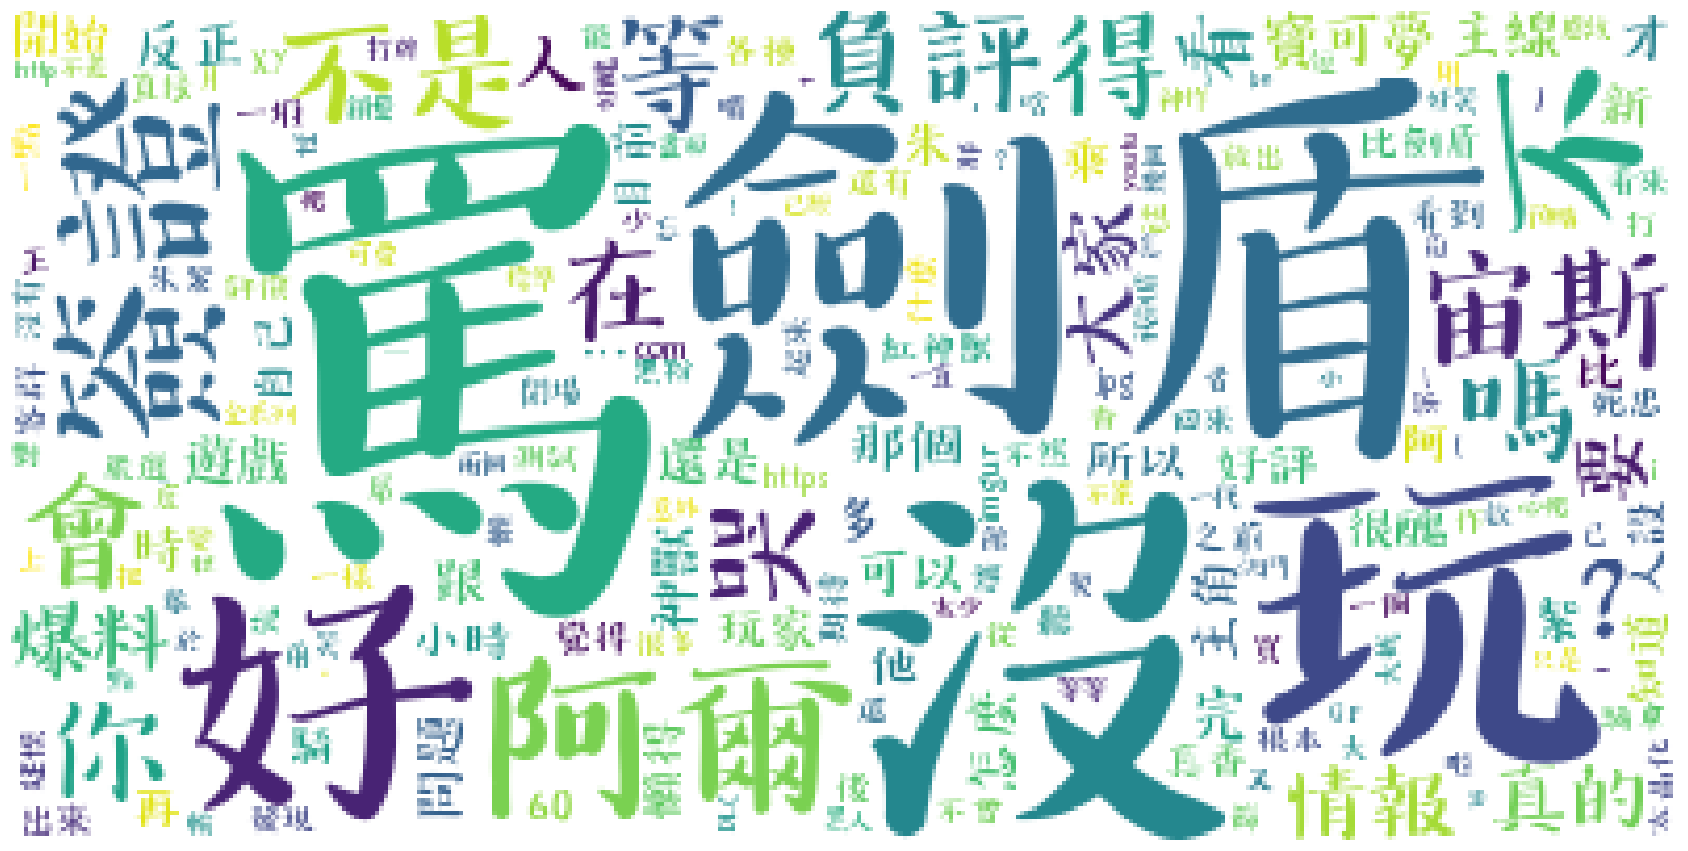

In [267]:
#繪圖
font = "HanyiSentySong.ttf" #載入字體，最好是能顯示繁體或簡體中文的
wordcloud = WordCloud(background_color = "white", font_path=font)
wordcloud.generate_from_frequencies(results)
plt.figure(figsize=(30,30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()